<a href="https://colab.research.google.com/github/AbhinavJangra29/GANS/blob/main/GANS_simplified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

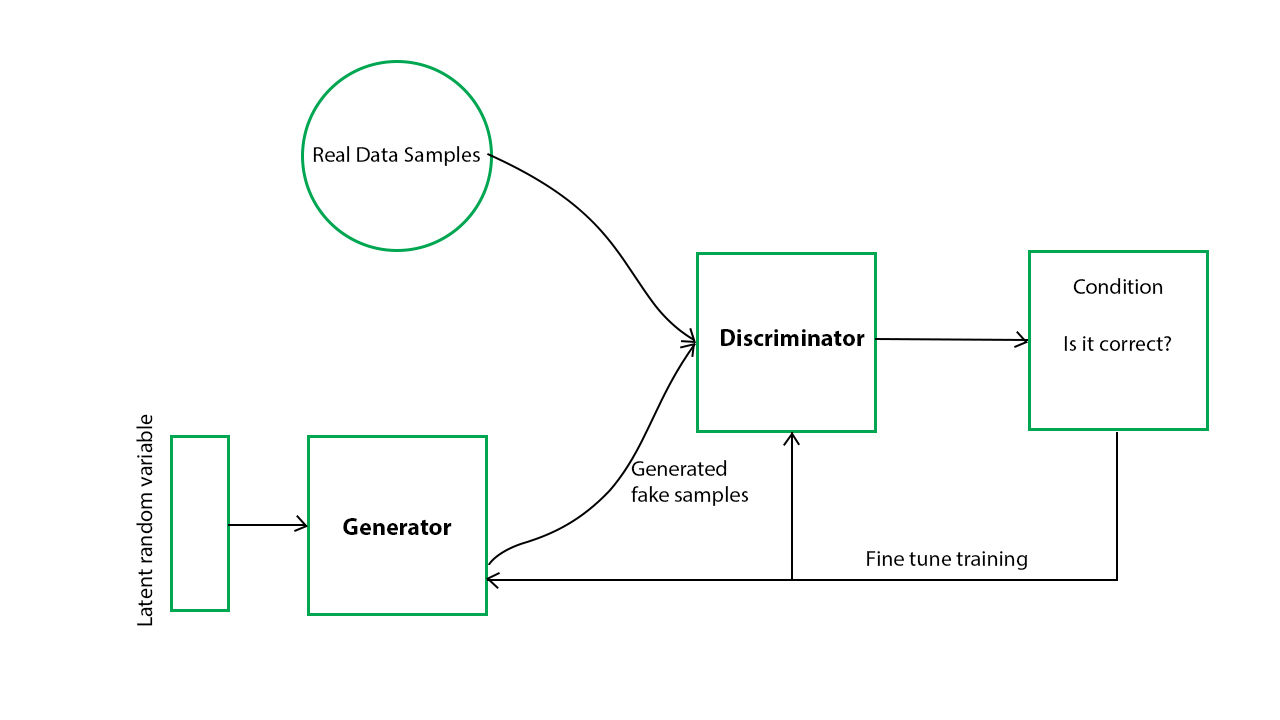

how do gans work? simple , the generator generates and the discriminator distinguishes the generated image as real or fake. They both play a game with each other. The generator gives a generated image to discriminator and the discriminator tells if the image is fake or real and with every iteration of the game they both get better with time. At some point the generator becomes so proficient that it is able to produce completely new samples which the discriminator is unable to distunguish as fake.


the generator trains on trying to fool the discriminator,i.e it wants to make the response of discriminator on fake images as real
the discriminator is trying to identify a real image as real and a fake image as fake.

# PyTorch GAN Example: Importing Libraries

In this section, we import the necessary libraries for our PyTorch Generative Adversarial Network (GAN) example.

- **`torch`**: Core PyTorch library for tensor operations.
- **`optim`**: Module for optimization algorithms such as Adam used to update model parameters.
- **`nn`**: Neural network modules, including layers and loss functions.
- **`torch.utils.data`**: Utilities for handling data, including the `DataLoader` class for efficient loading of datasets.
- **`torchvision`**: Provides access to popular datasets, model architectures, and image transformations.
- **`matplotlib.pyplot`**: Library for creating visualizations and plots.
- **`numpy`**: Fundamental package for array operations and numerical computations.




In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils import data
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Configuration Parameters

Here, we define key configuration parameters for our Generative Adversarial Network (GAN) example.

- **`learning_rate`**: The learning rate for the optimizer (set to `3e-4` in this case).
- **`z_dim`**: The dimensionality of the latent space or noise vector (set to `64`).
- **`img_dim`**: The dimensionality of the input image (set to `28*28*1` for a 1-channel image).
- **`batch_size`**: The number of samples in each batch during training (set to `32`).
- **`num_epochs`**: The total number of training epochs (set to `25`).

These parameters will influence the training dynamics and the overall performance of the GAN.



In [ ]:
learning_rate=3e-4
z_dim=64
img_dim=28*28*1#784
batch_size=32
num_epochs=25


# Generator Architecture and Dimension Sequence

Let's break down the Generator's architecture and dimension sequence step by step:

1. **Input Layer (`linear1`):**
   - **Analogy:** Think of this as the artist's initial sketch.
   - **Dimensions:**
     - Input: A blank canvas (noise vector of size `z_dim`).
     - Output: A rough sketch on the canvas (256 features).

2. **Activation Function (`relu`):**
   - **Analogy:** Imagine adding more details and refining the sketch.
   - **Dimensions:**
     - Input: The rough sketch from the previous step (256 features).
     - Output: A more detailed and refined sketch.

3. **Hidden Layer (`linear2`):**
   - **Analogy:** Picture the artist adding colors and finalizing the artwork.
   - **Dimensions:**
     - Input: The detailed sketch (256 features).
     - Output: The final artwork (image with dimensions `img_dim`).

4. **Activation Function (`tanh`):**
   - **Analogy:** Converting the artwork to grayscale and adjusting the contrast.
   - **Dimensions:**
     - Input: The final artwork.
     - Output: The transformed artwork in a standardized format between -1 and 1.

In simple terms, the Generator takes a blank canvas (noise vector), creates a rough sketch, adds details, and then produces the final artwork. The Tanh activation ensures the generated image is in a suitable range for grayscale images.


In [ ]:
class Generator(nn.Module):
  def __init__(self,z_dim,img_dim):
    super(Generator,self).__init__()
    self.linear1=nn.Linear(z_dim,256)
    self.relu=nn.LeakyReLU(0.1)
    self.linear2=nn.Linear(256,img_dim)
    self.tanh=nn.Tanh()

  def forward(self,x):
    out=self.linear1(x)
    out=self.relu(out)
    out=self.linear2(out)
    out=self.tanh(out)
    return out


# Discriminator Architecture and Dimension Sequence

Now, let's break down the Discriminator's architecture and dimension sequence:

1. **Input Layer (`linear1`):**
   - **Analogy:** Think of this as an art critic analyzing an artwork.
   - **Dimensions:**
     - Input: The artwork (image with dimensions `img_dim`).
     - Output: A critical analysis (128 features).

2. **Activation Function (`relu`):**
   - **Analogy:** The critic giving opinions on different aspects of the artwork.
   - **Dimensions:**
     - Input: The critical analysis from the previous step (128 features).
     - Output: A refined critique.

3. **Hidden Layer (`linear2`):**
   - **Analogy:** The critic summarizing the overall evaluation.
   - **Dimensions:**
     - Input: The refined critique (128 features).
     - Output: A final verdict (a single value indicating real or fake).

4. **Activation Function (`sigmoid`):**
   - **Analogy:** The critic providing a score or probability.
   - **Dimensions:**
     - Input: The final verdict.
     - Output: A probability score between 0 and 1 (sigmoid activation).

In simple terms, the Discriminator takes an artwork (image), analyzes it, gives opinions, summarizes the evaluation, and provides a probability score indicating whether the artwork is real or fake.


In [ ]:
class Discriminator(nn.Module):
  def __init__(self,img_dim):
    super(Discriminator,self).__init__()
    self.linear1=nn.Linear(img_dim,128)
    self.relu=nn.LeakyReLU(0.1)
    self.linear2=nn.Linear(128,1)
    self.sigmoid=nn.Sigmoid()

  def forward(self,x):
    out=self.linear1(x)
    out=self.relu(out)
    out=self.linear2(out)
    out=self.sigmoid(out)
    return out

# Model Initialization and Noise Vector

Now, let's initialize our Discriminator and Generator models and create a fixed noise vector for generating images.

```python
# Initialize Discriminator and Generator models
discriminator = Discriminator(img_dim)
generator = Generator(z_dim, img_dim)

# Create a fixed noise vector for image generation
fixed_noise = torch.randn((batch_size, z_dim))


In [ ]:
discriminator=Discriminator(img_dim)
generator=Generator(z_dim,img_dim)
fix_noise=torch.randn((batch_size,z_dim))

# Data Normalization and Transformations

In machine learning, data normalization is a process of scaling the values of features to a standardized range. For image data, pixel values are typically normalized to a range between 0 and 1 or -1 and 1. Transformations, on the other hand, are operations applied to the data to augment, preprocess, or manipulate it.

## Normalization

### What is Normalization?

Normalization is like adjusting the brightness and contrast of an image to make it consistent and easy for the model to learn. In the context of our dataset:

- **Original Range:** Pixel values in the MNIST dataset are initially between 0 and 255.
- **Normalized Range:** We scale them to be between -1 and 1, making it easier for our neural network to process.

### How it's Done:

```python
tf = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5,), (0.5,)),]
)


In [ ]:
#normalising and transforming
tf = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.5,), (0.5,)),]
)
dataset = torchvision.datasets.MNIST(root="dataset/", transform=tf, download=True)
loader = data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Plotting Real Data for Discriminator

Here, we visualize a batch of real data samples that will be fed into the Discriminator during training.

```python
# Get the next batch of real data
real_sample = next(iter(loader))[0]

# Create an image grid for visualization
img_grid_real = torchvision.utils.make_grid(real_sample, normalize=True)

# Convert the PyTorch tensor to a NumPy array for plotting
npgrid = img_grid_real.numpy()

# Plot the image grid
plt.imshow(np.transpose(npgrid, (1, 2, 0)), interpolation='nearest')
plt.axis('off')


we plot this to take an observation of how the real data looks like

(-0.5, 241.5, 121.5, -0.5)

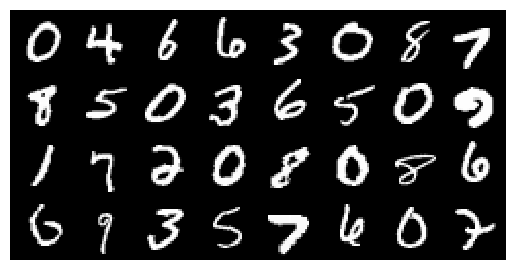

In [ ]:
# Plotting real data to be fed to the discriminator
real_sample = next(iter(loader))[0]  # Get the next batch of real data
img_grid_real = torchvision.utils.make_grid(real_sample, normalize=True)
npgrid = img_grid_real.numpy()
plt.imshow(np.transpose(npgrid, (1, 2, 0)), interpolation='nearest')
plt.axis('off')


# Optimizers and Loss Function

In this section, we set up the optimizers for our models and define the loss function.

## Optimizers

```python
# Optimizer for the Discriminator
opt_discriminator = optim.Adam(discriminator.parameters(), lr=learning_rate)

# Optimizer for the Generator
opt_generator = optim.Adam(generator.parameters(), lr=learning_rate)


In [ ]:

#optmizers and loss
opt_discriminator=optim.Adam(discriminator.parameters(),lr=learning_rate)
opt_generator=optim.Adam(generator.parameters(),lr=learning_rate)
#loss
criterion=nn.BCELoss()


# **HOW ARE GANS TRAINING?**
# GAN Training Approach: Intuitive Explanation

- **Generator's Task:**
  - Takes random input noise and attempts to create a synthetic image.
  - This generated image is then passed to the Discriminator for evaluation.

- **Discriminator's Task:**
  - Discriminator is like an art critic; it learns to distinguish between real and fake images.
  - It receives both real images from the dataset and synthetic images from the Generator.

- **Training Discriminator:**
  - Real images are reshaped and labeled as "real" (1).
  - Discriminator evaluates the likelihood of the real images being real (log(D(real))).
  - Fake images generated by the Generator are labeled as "fake" (0).
  - Discriminator evaluates the likelihood of fake images being fake (log(1 - D(G(z)))).
  - The total Discriminator loss is the average of these two.

- **Updating Discriminator Weights:**
  - Discriminator's weights are adjusted to maximize the total loss.
  - It aims to become better at distinguishing real from fake images.

- **Training Generator:**
  - Generator aims to create images that fool the Discriminator.
  - It generates fake images using random noise.
  - These fake images are fed into the Discriminator.
  - The Generator's loss is based on the likelihood of the Discriminator being fooled (log(D(G(z)))).

- **Updating Generator Weights:**
  - Generator's weights are adjusted to minimize its loss.
  - It aims to generate images that are more realistic and challenging for the Discriminator.

This cyclic process of training the Discriminator and Generator iteratively improves both models over time, resulting in the generation of more realistic synthetic images.







In [ ]:
#training of generator and discriminator

for epoch in range(num_epochs):
  for batch_idx, (real,_) in enumerate(loader):
    real=real.view(-1,784)
    batch_size=real.shape[0]
    #training discriminator
    noise=torch.randn(batch_size,z_dim)

    #we generate fake image: the generator takes random noise as input and try to construct an image from it.
    fake=generator(noise)
    #disc_real is the response of discriminator on real image , ones_like(disc_real) is the target we want to achive
    disc_real=discriminator(real).view(-1)
    lossD_real=criterion(disc_real,torch.ones_like(disc_real))
    #disc_fake is the response of discriminator on fake image , zeroes_like(disc_real) is the target we want to achive
    disc_fake=discriminator(fake).view(-1)
    lossD_fake=criterion(disc_fake,torch.zeros_like(disc_fake))
    '''
    so basically here we trained the discriminator to identify fake image as fake
    and real image as real
    fake->0 and real->1

    '''

    #total loss we take mean
    lossD=(lossD_real+lossD_fake)/2
    #update
    discriminator.zero_grad()
    lossD.backward(retain_graph=True)#retain graph true helps us by checkpointing the particular instance to train generator on the response of discriminator on fake image
    opt_discriminator.step()

   #training the generator
    #retain graph = true helped us to keep a checkpoint on that particular fake instance
    output=discriminator(fake).view(-1)
    lossG=criterion(output,torch.ones_like(output))
    '''
    the generator is interested in
    what the discriminator responded to a fake(generated) image,
    generator wants to fool the discriminator
    therefore it will try to make that reponse as 1(1->real)
    generator wants to make the reponse of discriminator on fake image
    as 1 .

    '''
    generator.zero_grad()
    lossG.backward()
    opt_generator.step()

    if batch_idx == 0:
        print( "Epoch: {epoch} \t Discriminator Loss: {lossD} Generator Loss: {lossG}".format( epoch=epoch, lossD=lossD, lossG=lossG))


Epoch: 0 	 Discriminator Loss: 0.6506878137588501 Generator Loss: 0.728919506072998
Epoch: 1 	 Discriminator Loss: 0.2047346979379654 Generator Loss: 1.9376438856124878
Epoch: 2 	 Discriminator Loss: 0.5298221111297607 Generator Loss: 0.961971640586853
Epoch: 3 	 Discriminator Loss: 0.643018364906311 Generator Loss: 0.9334772229194641
Epoch: 4 	 Discriminator Loss: 1.0527551174163818 Generator Loss: 0.6159599423408508
Epoch: 5 	 Discriminator Loss: 0.3791605234146118 Generator Loss: 1.2051312923431396
Epoch: 6 	 Discriminator Loss: 0.7360836863517761 Generator Loss: 0.8615719079971313
Epoch: 7 	 Discriminator Loss: 0.5322799682617188 Generator Loss: 1.1593163013458252
Epoch: 8 	 Discriminator Loss: 0.5449835062026978 Generator Loss: 1.1303631067276
Epoch: 9 	 Discriminator Loss: 0.7190340757369995 Generator Loss: 0.9333128929138184
Epoch: 10 	 Discriminator Loss: 0.7672030925750732 Generator Loss: 1.146661639213562
Epoch: 11 	 Discriminator Loss: 0.7313984036445618 Generator Loss: 1.04

#now its time to plot the generated images! isnt it awesome? we just made an entity which learned from the data we gave it and now it can generate the data on its own? how amazing it is, it is the first step we took in generating something from scratch.

(-0.5, 241.5, 121.5, -0.5)

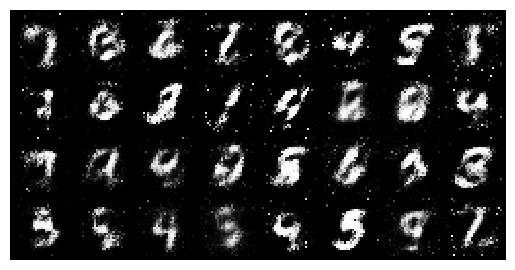

In [ ]:
fake = generator(noise).reshape(-1, 1, 28, 28)
img_grid_fake = torchvision.utils.make_grid(fake, normalize=True)
npgrid = img_grid_fake.cpu().numpy()
plt.imshow(np.transpose(npgrid, (1, 2, 0)), interpolation='nearest')
plt.axis('off')
